$H(\vec{\sigma}) =- \sum_{x=1}^L \sigma_x \left[\frac{J}{2}(\sigma_{x+1} + \sigma_{x-1}) + h \right]$ with $L+x = x$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


#1 Problem: The 1D Ising model

 Write a function that takes as arguments an array of L spins, $\vec{\sigma} = \{σ_1,...,σ_L\}$, the coupling constant J, and the magnetic ﬁeld h, and returns the energy of that conﬁguration $\vec{\sigma}$ (be careful about the boundary condition). 

In [ ]:
def energy(sigma,J,h):
  """This function allow us to compute the energy of configuration sigma, 
  with J the coupling constant and h the magnatic field"""

  L = len(sigma)
  sum = 0
  for i in range(L):
    if ((i-1)>=0)&(i+1<L): # this condition is use the verify the boundary condition
      sum = sum -sigma[i]*(J/2*(sigma[i-1] + sigma[i+1])+ h)
    elif i-1 <0: # this condition is use to consider the boundary condition in the left of sigma
      sum = sum -sigma[i]*(J/2*(sigma[L-1] + sigma[i+1])+ h)
    elif i+1 == L: #this condition is use to consider the boundary condition in the right of sigma
       sum = sum -sigma[i]*(J/2*(sigma[i-1] + sigma[0])+ h)
  return sum

Write a function that compute the absolute value of the magnetization of the sequence $\vec{\sigma}$ (normalized between $0$ and $1$).

In [ ]:
def Magnetization(sigma):
  """ This function compute the magnetization of sigma and return the 
  absolute value between 0 and 1"""
  """sigma must be an array"""
  sigma= np.array(sigma)
  return np.abs(sigma.sum()/len(sigma))

 Check that for a sequence of aligned spins and $h = 0$, the ﬁrst function that you wrote returns the energy$−J∗L$, while the second one a magnetization of 1. 

In [ ]:
A = 10 # length sigma
sigma1 = [1 for i in range(A)]
sigma2 = [-1 for i in range(A)]
J= 0.5
h=0
print("The value of the energy for h ={} with {} as size is {} knowing that all the spin are up.".format(h,len(sigma1),energy(sigma1,J,h)))
print("The value of the magnatization is {}".format(Magnetization(sigma1)))
print("The value of the energy for h ={} with {} as size is {} knowing that all the spin are down.".format(h,len(sigma2),energy(sigma2,J,h)))
print("The value of the magnatization is {}".format(Magnetization(sigma2)))

The value of the energy for h =0 with 10 as size is -5.0 knowing that all the spin are up.
The value of the magnatization is 1.0
The value of the energy for h =0 with 10 as size is -5.0 knowing that all the spin are down.
The value of the magnatization is 1.0


 Check that for a sequence of randomly generated spins and h = 0, the energy is distributed around zero.


In [ ]:
# let's generate a sequence of random number and compute the energy
np.random.seed(1234)
ener =[] # for energy
n= 1000 # nomber of sequences
h=0
j=0.5
for i in range(5,n):
  sigma = 2*np.random.randint(0,2,i) - 1
  ener.append(energy(sigma,j,h))
sequence = [ i for i in range(5,n)]

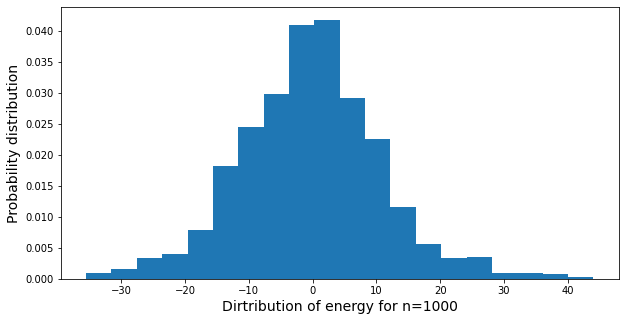

In [ ]:
plt.figure(figsize=(10,5))
plt.xlabel("Dirtribution of energy for n={}".format(n), fontsize=14)
plt.ylabel("Probability distribution", fontsize=14)
res = plt.hist(ener, bins=20, density=True)

From the graph, we notice that the distribution of the energy is around 0

# 2)Metropolis Markov chain

To generate samples from the canonical probability distribution over the microstates $\vec{\sigma}$ you will write the basic Metropolis algorithm. The ﬁrst step is to generate a transition between two conﬁgurations. The Metropolis algorithm prescribes that, given $\vec{\sigma}$, you ﬂip a spin, say $\bar x$ , generating a candidate conﬁguration $\vec{\sigma}'$, where $\vec{\sigma}_{\bar x}' = − \vec{\sigma}_{\bar x}$. Then the energy diﬀerence between the two conﬁguration is computed, let us call it $∆E = H(\vec{\sigma}') −H(\vec{\sigma})$. If $∆E ≤ 0$, accept the new candidate, if not, accept the candidate only with probability p = exp[−β∆E]. 

a) First, write a formula to compute ∆E and test it

In [ ]:
#  J = 1, h = 0.1, σ = (−1,1,1)
J=1; h= 0.1
sigma = [-1,1,1]
sigma1 = np.copy(sigma)

#g = np.random.choice(range(len(sigma))) #choose a spin index to flip
g= 0
sigma1[g] = -sigma1[g] # flip the corresponding spin at the index g.
L=len(sigma)
delta = energy(sigma1,J,h) -energy(sigma,J,h)
if delta<=0:
  print("the difference energy is {} and the index of spin is {}".format(delta,g))


the difference energy is -4.2 and the index of spin is 0


a) Write a function that takes as arguments a conﬁguration, $\vec{\sigma}$, the coupling constant J, and the magnetic ﬁeld h, the inverse temperature β, and returns a new conﬁguration according to the Metropolis prescription. 

In [ ]:
def Metropolis(sigma,J,h,b):
  """This funtion function flip a spin inside the configuration sigma and 
  return new configuration according to Metropolis prescription, 
  b is the inverse temperature, h: magnatic field,J coupling constant"""

  sigma1 = np.copy(sigma)
  g = np.random.choice(range(len(sigma))) #choose the spin index to flip
  sigma1[g] = -sigma1[g] # flip the corresponding spin at g.
  delta = energy(sigma1,J,h) -energy(sigma,J,h)
  if delta<=0 or np.random.rand()<=np.exp(-b*delta):
   sigma[g] = -sigma[g]
  return sigma

c)  Iterate the function above for some steps starting from a random initial conﬁguration of L = 200 spins. Check that, choosing a small temperature $\beta = 10$, and a small magnetic ﬁeld h = 0.1, you end up in a conﬁguration where all the spins are aligned to 1 after enough iterations.


In [ ]:
# parameter
import time
L= 2000
J=1
b= 10
h=0.1
np.random.seed(23478)
sigma = 2*np.random.randint(0,2,L)-1 # Initial state

states = []
a=np.array(sigma)
# Time steps of the chain
t=0
t1 = time.time()
while len(a[a>0])!= len(a):
  t=t+1
  sigma =Metropolis(sigma,J,h,b)
  a= np.array(sigma)
print("The first times to get the confirguration where all the spin are up is {} s after {} iteration".format(time.time()-t1,t))

The first times to get the confirguration where all the spin are up is 509.35045313835144 s after 21420 iteration


#2.2 Generating samples and computing the magnetization

You know that the Markov chain of states obtained through iteration of the previous function does not generate reliable samples. Indeed, you need to equilibrate the chain and also discard a lot of samples to remove correlation. By using properly generated samples, you can compute the average absolute magnetization over them: $<M> = \frac{1}{N}\sum_{\vec{\sigma}}|M(\vec{\sigma})|$ with $M(\vec{\sigma}) = \frac{1}{L}\sum_j \sigma_j$

a) Write a function that generates reliable samples with the Metropolis algorithm. The function takes as argument the length of the chain L, the inverse temperature $\beta$, the coupling constant J, the magnetic ﬁeld h, the equilibration time $t_e$, the correlation time $t_c$ and the number of samples N. It returns the list/array of the N generated good samples. Remember to discard the samples for the equilibration and for the removal of correlations. Each time you get a new good sample add it to a list.


In [ ]:
from copy import copy

def Samples_Metropolis(L,beta,J,h,te,tc,N):
  """ "L" is the length of the chain, "beta" inverse temperature, "J" coupling constant
  "h" maganetic field, "te" equilibration time, "tc" correlation time and "N" number of samples
  the function return a liste of N independant samples"""

  sigma1 = 2*np.random.randint(0,2,L)-1 # Initial state
  states = []
  # Time steps of the chain
  t=0
  while t<=te+1:
    t=t+1
    sigma1 =Metropolis(sigma1,J,h,beta)
  # We have already gotten the starting configuration to build independent good samples.
  compt = 0
  while compt<=N :
    for _ in range(tc+1):
      sigma1 =Metropolis(sigma1,J,h,beta)
    
    a=np.array(sigma1)
    states.append(copy(sigma1))
    compt +=1
  
  return states

      
  


b) Check that the average absolute magnetization computed over the samples generated with the previous function is close to 1 for h = 0.1 and $\beta = 3$ (use also $L = 200, te = 30000, tc = 5000, N$ as large as you can). Check also that it is close to zero for $\beta = 0.1$. 

In [ ]:
h = 0.1; beta1 = 3; L=200; te = 30000; tc = 5000;J=1;N=100;beta2 = 0.1;
sample1 = Samples_Metropolis(L,beta1,J,h,te,tc,N)
sample2 = Samples_Metropolis(L,beta2,J,h,te,tc,N)
print("The mean of the magnetization for beta egale {} is {}".format(beta1,np.mean(sample1)))
print("The mean of the magnetization for beta egale {} is {}".format(beta2,np.mean(sample2)))

In [ ]:
np.mean(sample2[1])

c) Using the function above plot the average absolute magnetization as a function of diﬀerent temperatures.

In [ ]:
b=np.linspace(0.1,3,10)
h = 0.1; beta1 = 3; L=200; te = 30000; tc = 5000;J=1;N=100;beta2 = 0.1;
mean = []
for i in b:
  mean.append(np.mean(Samples_Metropolis(L,i,J,h,te,tc,N)))

In [ ]:
plt.figure(figsize= (10,5))
plt.plot(b,mean)
plt.xlabel('Temperature')
plt.ylabel('Magnetization')
plt.show()

 Use the function for generating samples of the Ising model to give a numerical answer to the questions of the theoretical part.


# Theoretical questions

Consider the case of the above system with L = 3, h = 0.2, and J = 1. 

a) What are the probabilities $P_2(1)$ and $P_2(−1)$ that $\sigma _2 = 1$ and $\sigma_2 = −1$, respectively, if the system’s temperature is ﬁxed at $T = 2/k_B$?


For $\sigma_2 =-1$ we have $\vec{\sigma} = (a,-1,b)$ with $a,b \in\{-1,1\}$ \\
The total energy for that configuration is given by \\
\begin{align}
H(\vec{\sigma}) &= -\frac{a}{2}(-1+b)-0.2a+\frac{1}{2}(a+b)+0.2 - \frac{b}{2}(-1+a)-0.2b \\
&= 0.5(-2ab +2a + 2b) 0.2 -0.2a-0.2b \\
&= -ab + a+b -0.2 - 0.2b + 0.2\\
H(\vec{\sigma}) &=0.8a +0.8b -ab+0.2
\end{align}

we have the following configuration : \\
$(1,-1,1);(1,-1,-1);(-1,-1,-1);(-1,-1,1)$ with $H = 0.8,H =1.2, H=-2.4$,and $ H=1.2$ as respectives energy.


For $\sigma_2 =1$ we have $\vec{\sigma} = (a,1,b)$ with $a,b \in\{-1,1\}$ \\
The total energy for that configuration is given by \\\\

\begin{align}
H(\vec{\sigma}) &= -0.8a -0.8b -ab-0.2
\end{align}

we have the following configuration : \\
$(1,1,1);(-1,1,1);(-1,1,-1);(1,1,-1)$ with $H = -2.8,H =0.8, H=0.4$,and $ H=0.8$ as respectives energy. 

Let's compute the partifion function

$Z= \exp(-0.5*0.8)+\exp(-0.5*1.2)+\exp(0.5*2.4)+\exp(-0.5*1.2)+\exp(-0.5*2.8)+\exp(0.5*2.8) + \exp(-0.5*0.8)+\exp(-0.5*0.4)+\exp(-0.5*0.8)$\\
$Z=11.302631052954176$

In [ ]:
3*np.exp(-0.4) + 2*np.exp(-0.6) + np.exp(1.2) + np.exp(1.4) + np.exp(-0.2)

11.302631052954176

Let's compute the probabilities

$P(\sigma_2 =-1) = \frac{e^{-0.4} + e^{-0.6} + e^{1.2} + e^{-0.6}}{Z} = 0.45$ \\
$P(\sigma_2=1) = \frac{e^{1.4} + 2e^{-0.4} + e^{-0.2}}{Z}  = 0.55 $ \\

In [ ]:
(np.exp(-0.4) + np.exp(-0.6) + np.exp(1.2) + np.exp(-0.6))/(3*np.exp(-0.4) + 2*np.exp(-0.6) + np.exp(1.2) + np.exp(1.4) + np.exp(-0.2))

0.450166002687522

In [ ]:
(np.exp(1.4) + 2*np.exp(-0.4) + np.exp(-0.2))/(3*np.exp(-0.4) + 2*np.exp(-0.6) + np.exp(1.2) + np.exp(1.4) + np.exp(-0.2))

0.5498339973124778

a) What is the probability $P_M(3)$ that the system’s total magnetization $M = 3$ at the temperature $T = 2/k_B$? \\

$\beta = 0.5$


Let's consider a magnetization here as non absolute value. The sample which give that result is $\vec{\sigma} = (1,1,1)$. From this we have: \\
$P_M(3) = \frac{e^{0.5*2.8}}{Z} = 0.36$ \\
But if the magnatization is the absolute value, we have : \\
$P_M(3) = \frac{e^{0.5*2.8}+e^{0.5*2.4}}{Z} = 0.65$ 

In [ ]:
np.exp(1.4)/(3*np.exp(-0.4) + 2*np.exp(-0.6) + np.exp(1.2) + np.exp(1.4) + np.exp(-0.2))

0.3587837157424301

In [ ]:
(np.exp(1.4)+np.exp(0.5*2.4)) /(3*np.exp(-0.4) + 2*np.exp(-0.6) + np.exp(1.2) + np.exp(1.4) + np.exp(-0.2))

0.6525309775243464

c) Check your results using your python simulations.

To do that, we will generate a large number of good samples in oder the compute the appearance probability of specific sample which we will compare to the theoretical value.

In [ ]:
h = 0.2; beta = 0.5; L=3; te = 30000; tc = 5000;J=1;N=1000;
sample = Samples_Metropolis(L,beta,J,h,te,tc,N)

Numerical probability of $P(\sigma_2=1)$

In [ ]:
compt = 0
for l in sample:
  if l[1]==1:
    compt +=1
print("The numerical probability is {}".format(compt/N))

The numerical probability is 0.625


Numerical probability of $P(\sigma_2=-1)$

In [ ]:
compt = 0
for l in sample:
  if l[1]==-1:
    compt +=1
print("The numerical probability is {}".format(compt/N))

The numerical probability is 0.376


Comparation between numerical and theoretical probability.

In [ ]:
h = 0.2; beta = 0.5; L=3; te = 30000; tc = 5000;J=1;N=1000;
prob1 = [] #for sigma 2= 1
prob2 = [] # for sigma 2= -1
for i in range(20):
  sample = Samples_Metropolis(L,beta,J,h,te,tc,N)
  compt1 = 0
  compt2 =0
  for l in sample:
    if l[1]==1:
      compt1 +=1
    if l[1]==-1:
      compt2 +=1
  prob1.append(compt1/N)
  prob2.append(compt2/N)

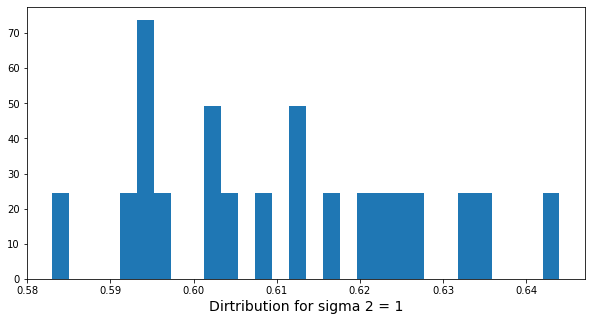

In [ ]:
plt.figure(figsize=(10,5))
plt.xlabel("Dirtribution for sigma 2 = {}".format(1), fontsize=14)
res = plt.hist(prob1, bins=30, density=True)

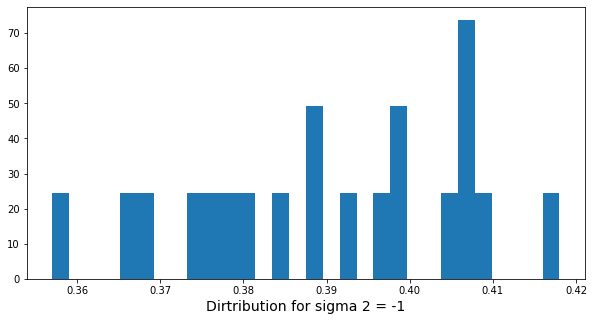

In [ ]:
plt.figure(figsize=(10,5))
plt.xlabel("Dirtribution for sigma 2 = {}".format(-1), fontsize=14)
res = plt.hist(prob2, bins=30, density=True)

 d) In your simulations for L = 200, consider a subsystem formed by spins $\{\sigma_1, \sigma_2, \sigma_3\}$ and estimate numerically $P_2(1), P_2(−1)$, and $P_M(3)$. How do these results compare with your theoretical estimates for the case of $L = 3$? Discuss your observations.


In [ ]:
h = 0.2; beta = 0.5; L=200; te = 30000; tc = 5000;J=1;N=1000;
prob1 = [] #for sigma 2= 1
prob2 = [] # for sigma 2= -1
sample = Samples_Metropolis(L,beta,J,h,te,tc,N)
compt1 = 0
compt2 =0
for l in sample:
  if l[1]==1:
    compt1 +=1
  if l[1]==-1:
    compt2 +=1
prob1.append(compt1/N)
prob2.append(compt2/N)
print("The probability to have sigma 2 = 1 with for {} spin is {}".format(L,prob1))
print("The probability to have sigma 2 = -1 with for {} spin is {}".format(L,prob2))